<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/ipynb/Lesson%2026/26_1_%D0%92%D0%B5%D0%B1_%D0%B0%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D0%B0_%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. Веб-архитектура сервиса
2. [Практическое использование REST API в Python](https://colab.research.google.com/drive/1bhlFqhZp0TtOuzqKJvI9C-K0FwRWMi2H)
3. [Введение в FastAPI](https://colab.research.google.com/drive/1_AzAVys4xub3yyw763NDwfeJ3WecGgkb)
4. [Домашняя работа](https://colab.research.google.com/drive/1SlJW51-OaUUDPuk-j9GYNHHwFkHBztU_)

**В данном уроке:**
1. Познакомимся с программными архитектурами **REST**, **RESTful** и **REST API**.
2. Познакомимся с библиотекой `requests` и с ее помощью научимся делать запросы к веб-серверу.
3. Изучим фреймворк **FastAPI**.
4. Превратим Colab в полноценный веб-сервер с поддержкой **REST API**.
5. Научимся пробрасывать локальные порты "наружу" (в сеть интернет).

Мы с вами уже научились создавать и обучать простые модели нейронной сети, и даже создавали простейшую инфраструктуру для разворачивания моделей в виде телеграм-бота и Yandex.Cloud.

Чаще всего пользователю предлагаются простые решения в виде web-сервиса, мобильного или настольного приложений с минималистичным интерфейсом, а основная магия происходит на удаленном сервере. Пользовательское приложение позволяет загружать данные, обрабатывать их, отправлять на сервер с моделью, получать результат от модели и выводить данные для пользователя в удобном виде.

Такой подход позволяет создавать крупные системы, состоящие из множества компонент, каждая из которых отвечает за свою функциональность. А пользователю это предоставляет возможность работать с моделью с разных устройств, разным уровнем доступа и без необходимости скачивать "тяжелые" модели на свое устройство.



## Что такое REST?

**REST (Representational state transfer)** – это архитектура программного обеспечения для распределенных систем (клиент-серверных), которая широко используется для построения веб-служб.

Можно сказать, что **REST** - это согласованный набор архитектурных принципов для создания более масштабируемой и гибкой сети.

Эти принципы отвечают на ряд вопросов:
* Какие у системы компоненты?
* Как они должны взаимодействовать друг с другом?
* Как быть уверенным, что можно заменять различные части системы в любое время? * Как система может масштабироваться для обслуживания миллиардов пользователей?

Этот общий набор принципов, характерных не только для Web. Он может быть применен к другим видам сетей, таким как встроенные системы. REST не является протоколом, так как он не задаёт деталей реализации.

Термин **REST** был введен в 2000 году Роем Филдингом, одним из авторов протокола **HTTP**. Системы, поддерживающие **REST**, называются **RESTful**-системами.

Филдинг сформулировал архитектурные ограничения, которым должна удовлетворять система, соответствующая требованиям RESTful:

1. **Клиент-сервер**. Сеть должна состоять ​​из клиентов и серверов. Сервер — это компьютер, который имеет требуемые ресурсы, а клиент — это компьютер, которому нужно взаимодействовать с ресурсами, хранящимися на сервере. RESTful-система должна производить операции в клиент-серверной модели, даже если компонент периодически ведёт себя то как клиент, то как сервер.
Альтернатива клиент-серверной архитектуре, построенная без REST — это интеграция, основанная на событиях. В этой модели, каждый компонент непрерывно передает события, перехватывая соответствующие события из других компонентов. В ней нет взаимодействия один-к-одному, только передача и перехват. REST требует взаимодействия один-к-одному, поэтому архитектура, основанная на событиях не будет удовлетворять требованиям RESTful.

2. **Отсутствие состояния**. Понятие "без состояния" не означает, что серверы и клиенты его не имеют, у них просто нет необходимости отслеживать состояние друг друга. Когда клиент не взаимодействует с сервером, сервер не имеет представления о его существовании. Сервер также не ведёт учет прошлых запросов. Каждый запрос рассматривается как самостоятельный.

3. **Единообразие интерфейса**. между серверами и клиентами существует общий язык, который позволяет каждой части быть заменяемой или изменяемой, без нарушения целостности системы. Это достигается через 4 следующих ограничений: определение ресурсов, манипуляцию ресурсами через представления, «самодостаточные» сообщения и гипермедиа.

4. **Определение ресурсов**. В терминологии REST что угодно может быть ресурсом — HTML-документ, изображение, информация о конкретном пользователе и т.д. Каждый ресурс должен быть уникально обозначен постоянным идентификатором. «Постоянный» означает, что идентификатор не изменится за время обмена данными, и даже когда изменится состояние ресурса. Если ресурсу присваивается другой идентификатор, сервер должен сообщить клиенту, что запрос был неудачным и дать ссылку на новый адрес.

  > Web использует **URI** (уникальный идентификатор ресурса) для идентификации ресурсов, а HTTP — в качестве стандарта коммуникации. Чтобы получить ресурс, хранящийся на сервере, клиент делает к URI HTTP-GET-запрос, который идентифицирует этот ресурс. Каждый раз, когда вы набираете в браузере какой-то адрес, браузер делает GET-запрос на этот URI. Если браузер принимает в ответ 200 OK и HTML-документ обратно, то браузер рендерит (отрисовывает) страницу в окне, и вы ее видите.

  > **URI** — последовательность символов, идентифицирующая физический или абстрактный ресурс, который необязательно должен быть доступен через сеть Интернет, причем, тип ресурса, к которому будет получен доступ, определяется контекстом и/или механизмом.
  Например:
  * перейдя по http://example.com — мы попадем на http-сервер ресурса идентифицируемого как example.com;
  * ftp://example.com — приведет наc на ftp-сервер того же самого ресурса;
  * http://localhost/ — URI идентифицирующий саму машину откуда производится доступ;

  > В п.2 RFC3305 (RFC - это технические спецификации и стандарты мира Интернет) сообщается об устаревании такого термина как URL, применимо к ссылкам, и что отныне верным будет именование URI, с того момента, во всех документах W3C (сообщество "генерирующее" эти самые стандарты) использует термин URI. Исходя из этого, применяя термин URL к соответствующим ссылкам, вы не делаете смысловой ошибки, но делаете ее с точки зрения правильного именования.

5. **Управление ресурсами через представления**. Клиент управляет ресурсами, направляя серверу представления, обычно в виде JSON-объекта, содержащего контент, который он хотел бы добавить, удалить или изменить. В REST у сервера полный контроль над ресурсами, и он отвечает за любые изменения. Когда клиент хочет внести изменения в ресурсы, он посылает серверу представление того, каким он видит итоговый ресурс. Сервер принимает запрос как предложение, но за ним всё так же остаётся полный контроль. Когда пользователь создаёт новый пост в блоге, его компьютер должен сообщить серверу, что в блог нужно добавить новую запись. Чтобы это выполнить, он посылает HTTP-POST-запрос или PUT-запрос с содержимым в виде новой записи в блоге. Сервер возвращает ответ, указывающий, что запись создана или была проблема. Т.е. клиент в буквальном смысле отправляет серверу представление того, каким он хочет видеть конечный ресурс.

6. **Самодостаточные сообщения**. Это ещё одно ограничение, которое гарантирует унифицированность интерфейса у клиентов и серверов. Только самодостаточное сообщение содержит всю информацию, которая необходима для понимания его получателем. В отдельной документации или другом сообщении не должно быть дополнительной информации.

  Чтобы понять, как это касается WEB, давайте проанализируем набор HTTP запросов и ответов.

  Когда пользователь набирает `www.example.com` в адресной строке веб-браузера, браузер отправляет соответствующий HTTP-запрос:

  `GET / HTTP/1.1`

  `Host: www.example.com`

  Это самодостаточное сообщение, потому что оно передаёт серверу какой был использован HTTP-метод и какой протокол (HTTP 1.1).

  Сервер может послать ответ вроде такого:
  ```
  HTTP / 1.1 200 OK
  Content-Type: text/html
  <!DOCTYPE html>
  Hello World!
  ...

  ```
  Это самодостаточное сообщение, потому что оно сообщает клиенту, как интерпретировать текст сообщения (`Content-type = text/html` указывает, что это HTML-документ). У клиента есть всё, что необходимо, в этом одном сообщении для обработки его соответствующим образом.

7. **Гипермедиа**. Гипермедиа — это пафосное понятие для обозначения данных, которые содержат информацию о том, что клиенту нужно делать дальше, другими словами, какие еще запросы он может сделать. В REST серверы должны посылать клиентам только гипермедиа. HTML — это один из видов гипермедиа. Например, HTML-страница может содержать ссылки, кнопки и другие элементы управления, при нажатии на которые будут выполнены новые запросы к серверу.

  > Когда система имеет идентификаторы для каждого ресурса, управляет ими через направление представлений от клиента серверу, содержит самодостаточные сообщения и составлена из гипермедиа, то говорят, что у неё унифицированный интерфейс. Возможно, это самый важный атрибут RESTful системы, так как он позволяет клиентам приспосабливаться к изменениям. Сервер может изменить базовую реализацию, не обрывая всех клиентов, которые взаимодействовали с ним, потому что каждое взаимодействие самодостаточно: идентификаторы не изменяются при изменении базовых состояний или реализациии, а гипермедиа дает клиентам инструкции для переходов из состояния в состояние, которые он может впоследствии исполнять. Серверу не нужно ничего помнить о клиенте или делать что-то особенное, чтобы удовлетворить его, и наоборот.

8. **Кэширование**. Ответы сервера должны помечаться как кэшируемые или некэшируемые. Кэширование происходит, когда клиент сохраняет ответы, полученные ранее от сервера. Когда эти данные нужны снова, кэширование может избавить от полного прохода данных по сети. Возможность кэшировать существует благодаря самодостаточным сообщениям. Клиенту не нужно беспокоиться о том, что случайно закэшируется только часть необходимой информации, а другие части потеряются.

9. **Система слоёв** предполагает наличие большего количества компонентов, чем клиент и сервер. В системе может быть больше одного слоя. Тем не менее, каждый компонент ограничен способностью видеть только соседний слой и взаимодействовать только с ним. Прокси — это дополнительный компонент, он ретранслирует HTTP-запросы на серверы или другие прокси. Прокси-серверы могут быть полезны для балансировки нагрузки и проверок безопасности. Прокси действует как сервер для начального клиента, который посылает запрос, а затем как клиент, когда ретранслирует эту просьбу. Шлюз — это еще один дополнительный компонент, он переводит HTTP-запрос в другой протокол, распространяет этот запрос, а затем переводит полученный ответ обратно в HTTP. Клиент может обращаться со шлюзом, как с обычным сервером. Пример шлюза — система, которая загружает файлы с FTP-сервера.

10. **Код по требованию**. Единственное опциональное ограничение, которое предполагает отправку сервером исполняемого кода клиенту. Это то, что происходит в HTML-теге `<script>`. HTML-документ формируется на сервере, а значит сервер может сгенерировать в странице код JavaScript, получив который, браузер исполнит его локально.

В целом, система **RESTful** — это любая сеть, которая отвечает ограничениям Филдинга. **RESTful-система** должна быть достаточно гибкой для различных сценариев использования, масштабируемой для размещения большого количества пользователей и компонентов, а также адаптируемой с течением времени.

Разработка Web-интерфейсов на основе RESTful-архитектуры для межкомпьютерных взаимодействий — это намного более сложная тема. Помните, что REST — это теоретический дизайн и тот Web, которая существует сегодня, все еще иногда не дотягивает до теории.

Однако, теперь на собеседованиях, вы можете смело говорить, что знаете RESTful, даже если и не знаете какой-то конкретный фреймворк. Самое главное, что вы знаете концепцию и сможете быстро разобраться во фреймворке. Намного хуже, когда программист "уверенно" пользуется фреймворком, нарушая его концепции (а многие фреймворки гибкие и позволяют это делать). Тогда код становиться непонятным для других разработчиков, сложно поддерживается и плохо интегрируется с другими продуктами.

## Что такое REST API?

Еще одно важное понятие, которое надо знать - **API** или **Application Programming Interface** (интерфейс прикладного программирования).

**API** - это набор правил взаимодействия одной программы с другой. Речь в данном случае может идти как о веб-сервисах, так и о внутренних методах операционной системы или методах, предоставляемых какой-либо программной библиотекой.

Например, библиотека **Tensorflow** предоставляет **API** для таких языков, как **Python**, **С++**, **JavaScript** и **Java** - это значит, что писать и выполнять код, реализующий одни и те же операции, можно на любом из этих языков.

Нас же будет интересовать **API** применительно к веб-сервисам, а точнее в контексте **REST**, т.е. мы будем говорить о **REST API** (правильнее RESTful API, но чаще применительно к API употребляют более упрощеную запись).

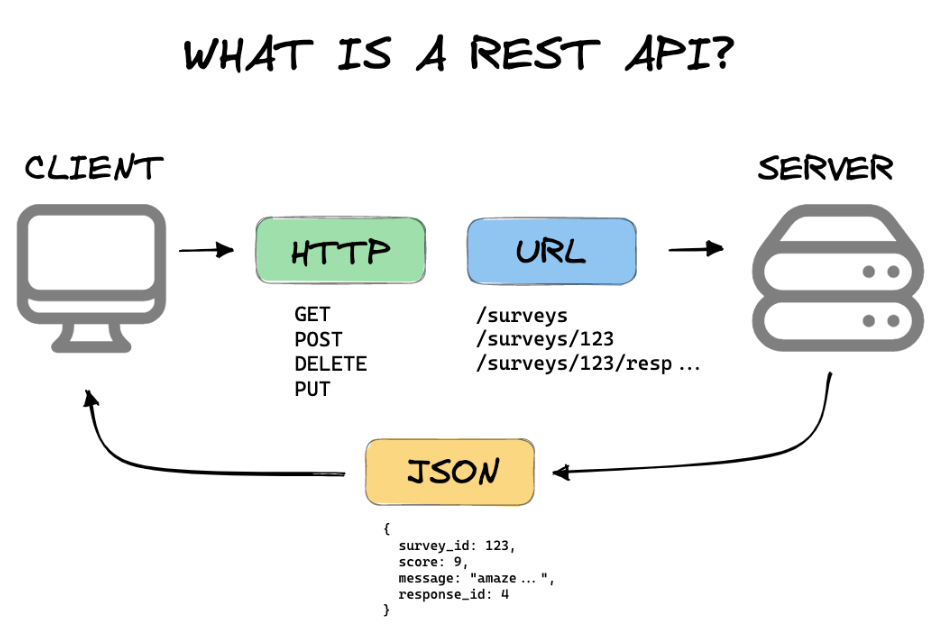

**Рис. 1. Схема REST API**

**REST API** позволяет использовать для взаимодействия между программами протокол **HTTP** (или его версия с шифрованием — **HTTPS**), с помощью которого мы получаем и отправляем большую часть информации в интернете.

> **HTTPS (HTTP Secure)** — это надстройка над протоколом HTTP, которая поддерживает шифрование посредством криптографических протоколов `SSL` и `TLS`. Они шифруют отправляемые данные на клиенте и дешифруют их на сервере. Это защищает данные от чтения злоумышленниками, даже если им удастся их перехватить.

Протокол **HTTP** довольно прост. Рассмотрим его работу на примере.

Допустим, есть адрес **http://example.com/samples**.

Он состоит из двух частей: первая — это адрес сайта или сервера, то есть **http://example.com**.

Вторая часть — адрес ресурса на удаленном сервере, в данном примере — **/samples**.

Набирая в адресной строке URL-адрес **http://example.com/samples**, мы на самом деле отправляем запрос на сервер **example.com** и запрашиваем ресурс под названием **/samples**. Это и есть **HTTP**-запрос.

Теперь представим, что по адресу **example.com** работает программа, к которой хочет обратиться другая программа. Чтобы программа понимала, что именно от нее вы хотите, для разных запросов используются различные адреса и действия (HTTP-методы).



Архитектура **REST API** — самое популярное решение для организации взаимодействия между различными программами. Протокол **HTTP** реализован во всех языках программирования и всех операционных системах.

Чаще всего **REST API** применяют:

- Для реализации клиент-серверного мобильного приложения;
- Для построения микросервисных серверных приложений. Это архитектурный подход, при котором большие приложения разбиваются на много маленьких частей;
- Для предоставления доступа к программам сторонних разработчиков. Например, сервисы обработки платежей, информационно-справочные системы и многое другое.
- Для реализации десктопных клиент-серверных приложений.

### HTTP-методы

Чтобы ресурс, который вы запрашиваете, выполнял нужные действия, используются разные способы обращения к нему. Например, если вы работаете с выборками с помощью ресурса **/samples**, то можете их просматривать, редактировать или удалять.

В **API**-системе четыре классических метода:

1. **GET** — метод чтения информации. **GET**-запросы всегда только возвращают данные с сервера, но никогда их не изменяют и не удаляют. Например, в приложении при помощи запроса **GET /samples** вы открываете список выборок данных.

2. **POST** — создание новых записей. В приложении запрос **POST /samples** будет использоваться для создания новой выборки.

3. **PUT** — редактирование записей. Например, запросом **PUT /samples** вы исправляете выборку.

4. **DELETE** — удаление записей. В нашем приложении запрос **DELETE /samples** удаляет старые или ненужные выборки.

Таким образом, вы получаете четыре функции, которые программа может использовать при обращении к данным одного и того же ресурса. Эти функции также называют операциями `CRUD`, по аналогии с терминологией баз данных (`C` - create, `R` - read, `U` - update, `D` - delete).

Однако стоит помнить, что RESTful - это набор правил, ограничений, а не строго определенный протокол. А значит, вы можете использовать только методы **GET** (для чтения) и **POST** (для всех остальных действий и для чтения в том числе), а в JSON-сообщении, отправляемого на сервер передавать нужное действие. Множество серверов в интернете обмениваются по такой схеме, и это тоже RESTful, ведь все 10 пунктов архитектурных ограничений выполняются.

Соглашения об использовании тех или иных **HTTP**-методов для различных функций в **REST** называются **шаблонами REST** или **REST-паттернами**.

Разные паттерны по-разному рассматривают методы **POST** и **PUT**. Если **PUT** предназначен для создания, замены или редактирования, то для **POST** требования гораздо менее строги. Поэтому пример ниже будет правильным и в таком виде, и если поменять местами **POST** и **PUT**.

Вообще говоря, **POST** может использоваться одновременно для всех действий изменения:

- **POST /sample/** – добавление выборки (данные в теле запроса)

- **POST /sample/3** – изменение конкретной выборки (данные в теле запроса)

- **POST /sample/3** – удаление конкретной выборки (тело запроса пустое)

Это позволяет иногда обходить неприятные моменты, связанные с использованием **PUT** и **DELETE**. Они могут быть запрещены на веб-сервере.

Из приведенного примера можно видеть, что составленные определенным образом шаблоны (паттерны) **REST** позволяют обходится только одним типом запроса, например, **POST**. Остается лишь правильно сформировать тело запроса с командами и данными.



### Статусы HTTP

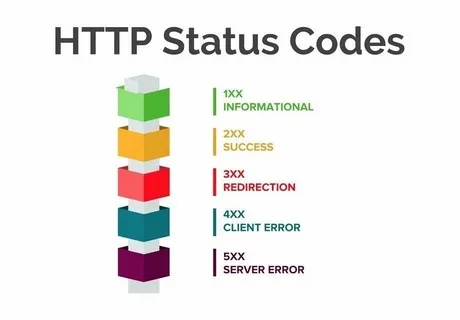

**Рис. 2. Структура статусов ответа HTTP**

Клиенту зачастую недостаточно просто отправить запрос на сервер. Во многих случаях надо дождаться ответа и понять, как сервер обработал запрос. Для этого были придуманы статусы ответов. Это трёхзначные числовые коды с небольшими текстовыми обозначениями.

>Каждый запрос **REST API** сообщает о результатах работы числовыми кодами — **статусами HTTP**.

Их можно увидеть в терминале или браузере. Сами коды делятся на 5 классов (см. рис. 2):

* Информационные ответы: коды 100–199

* Успешные ответы: коды 200–299

* Редиректы: коды 300–399

* Клиентские ошибки: коды 400–499

* Серверные ошибки: коды 500–599


Например, редактирование записи на сервере может отработать успешно (код **200**), может быть заблокировано по соображениям безопасности (код **401** или **403**), страница может быть недоступна (код **404**), а то и вообще сломаться в процессе из-за ошибки сервера (код **500**). Числовые коды ошибок — аналог пользовательских сообщений о результатах работы программы.

Рассмотрим основные коды, которые чаще всего встречаются в реальных задачах. С остальными более подробно можно ознакомиться в [реестре кодов состояния HTTP](https://www.iana.org/assignments/http-status-codes/http-status-codes.xhtml).

#### Информационные ответы

**100 Continue** — промежуточный ответ. Он указывает, что запрос успешно принят.  Клиент может продолжать присылать запросы или проигнорировать этот ответ, если запрос был завершён.

**101 Switching Protocol** присылается в ответ на запрос, в котором есть заголовок `Upgrade`. Это означает, что сервер переключился на протокол, который был указан в заголовке. Такая методика используется, например, для переключения на протокол *Websocket*.

**102 Processing** — запрос получен сервером, но его обработка ещё не завершена.

#### Успешные ответы

**200 OK** — запрос принят и корректно обработан веб-сервером.

**201 Created** — запрос корректно обработан и в результате был создан новый ресурс. Обычно он присылается в ответ на POST запрос.

#### Редиректы

**301 Moved Permanently** — запрашиваемый ресурс на постоянной основе переехал на новый адрес. Тогда новый путь к ресурсу указывается сервером в заголовке `Location` ответа.

**302 Found** — указывает, что целевой ресурс временно доступен по другому URI. Адрес перенаправления может быть изменен в любое время, а клиент должен продолжать использовать действующий URI для будущих запросов. Тогда временный путь к ресурсу указывается сервером в заголовке `Location` ответа.

**307 Temporary Redirect** — имеет то же значение, что и код **302**, за исключением того, что клиент не может менять метод последующего запроса.

**308 Permanent Redirect** — имеет то же значение, что и код **301**, за исключением того, что клиент не может менять метод последующего запроса.

#### Клиентские ошибки

**400 Bad Request** — запрос от клиента к веб-серверу составлен некорректно. Обычно это происходит, если клиент не передаёт необходимые заголовки или параметры.

**401 Unauthorized** — получение запрашиваемого ресурса доступно только аутентифицированным пользователям.

**403 Forbidden** — у клиента не хватает прав для получения запрашиваемого ресурса. Например, когда обычный пользователь сайта пытается получить доступ к панели администратора.

**404 Not Found** — сервер не смог найти запрашиваемый ресурс.

**405 Method Not Allowed** — сервер знает о существовании HTTP-метода, который был указан в запросе, но не поддерживает его. В таком случае сервер должен вернуть список поддерживаемых методов в заголовке `Allow` ответа. Такой код вы чаще всего будете получать, если примените **GET** запрос, там где ожидается **POST**.

#### Серверные ошибки

**500 Internal Server Error** — на сервере произошла непредвиденная ошибка.

**501 Not Implemented** — метод запроса не поддерживается сервером и не может быть обработан.

**502 Bad Gateway** — сервер, действуя как шлюз или прокси, получил недопустимый ответ от входящего сервера, к которому он обращался при попытке выполнить запрос.

**503 Service Unavailable** — сервер не готов обработать запрос (например, из-за технического обслуживания или перегрузки). Обратите внимание, что вместе с этим ответом должна быть отправлена ​​удобная страница с объяснением проблемы. Этот ответ следует использовать для временных условий, а HTTP-заголовок `Retry-After` по возможности должен содержать расчётное время до восстановления службы.

**504 Gateway Timeout** — этот ответ об ошибке выдается, когда сервер действует как шлюз и не может получить ответ за отведенное время.

**505 HTTP Version Not Supported** — версия HTTP, используемая в запросе, не поддерживается сервером.

В HTTP из всего диапазона кодов используется совсем немного. Те коды, которые не используются для задания определенной логики в спецификации, являются неназначенными и могут использоваться веб-серверами для определения своей специфической логики. Это значит, что вы можете, например, придать коду 513 значение «Некорректная форма входных данных модели», или любое другое.

### Структура запроса и ответа

Рассмотрим простой **пример запроса**:

```
GET /sample HTTP/1.0
Content-Type: text/html; charset=utf-8
Content-Length: 4
X-Custom-Header: value

test
```

В первой строчке указаны метод запроса — `GET`, путь к ресурсу — `/sample` и версия протокола —  HTTP/1.0.

Далее идёт блок заголовков. Заголовки — это пары `ключ: значение`, каждая из которых записывается с новой строки и разделяется двоеточием. Они передают дополнительные данные и настройки от клиента к серверу и обратно.

HTTP — это текстовый протокол, поэтому и все данные передаются в виде текста. Заголовки можно отделить друг от друга только переносом строки. Нельзя использовать запятые, точку с запятой, или другие разделители. Всё, что идет после имени заголовка с двоеточием и до переноса строки, будет считаться значением заголовка.

В примере серверу мы передали три заголовка:

* `Content-Type` — стандартный заголовок. Показывает, в каком формате будут передаваться данные в теле запроса или ответа (указываем, что это будет html документ в кодировке utf-8).

* `Content-Length` — сообщает длину контента в теле запроса в байтах.

* `X-Custom-Header` — пользовательские заголовки, начинающиеся с `X-` с произвольными именем. Через них реализуется специфическая логика обработки для конкретного сервера. Если веб-сервер не поддерживает такие заголовки, то он проигнорирует их.

После блока заголовков идёт тело запроса (отделено от заголовков пустой строкой), в котором передается текст `test`.

А так будет выглядеть **ответ от сервера**:

```
HTTP/1.1 200 OK
Date: Thu, 29 May 2024 19:20:01 GMT
Content-Type: text/html; charset=utf-8
Content-Length: 2
Connection: close
Server: gunicorn/19.9.0
Access-Control-Allow-Origin: *
Access-Control-Allow-Credentials: true

OK
```

В первой строке — версия протокола и статус ответа, например, **200 ОК**.

Далее идут заголовки ответа.

После блока заголовков — тело ответа (разделено от заголовков пустой строкой), в котором записан текст `OK`.

Тело запроса опционально и всегда отделяется от заголовков пустой строкой. А как понять, где оно заканчивается? Всё кажется очевидным: где кончается строка, там и заканчивается тело. Однако, два символа переноса строки в HTTP означают конец запроса и отправляют его на сервер.

**Как быть, если мы хотим передать в теле текст, в котором есть несколько абзацев с разрывами в две строки?**

```
POST /path HTTP/1.1
Host: localhost

Первая строка


Вторая строка после разрыва
```

По логике работы HTTP соединение отправится сразу после второй пустой строки и сервер получит в качестве данных только строку `Первая строка`. Описанную проблему решает специальный заголовок `Content-Length`. Он указывает на длину контента в байтах. Обычно клиенты (например, браузеры) автоматически считают длину передаваемых данных и добавляют к запросу заголовок с этим значением. Когда сервер получит запрос, он будет ожидать в качестве контента ровно столько байт, сколько указано в заголовке.

Однако, этого недостаточно для того, чтобы передать данные на сервер. Поведение зависит от реализации сервера, но для большинства из них необходимо также передать заголовок `Content-Type`. Он указывает на тип передаваемых данных. В качестве значения для этого заголовка используют MIME-типы.

> **MIME (Multipurpose Internet Mail Extensions, многоцелевые расширения интернет-почты)** — стандарт, который является частью протокола HTTP. Задача MIME — идентифицировать тип содержимого документа по его заголовку. К примеру, текстовый файл имеет тип `text/plain`, а HTML-файл — `text/html`.

Для передачи данных в формате **обычного текста** надо указать заголовок `Content-Type: text/plain`, а для **JSON** — `Content-Type: application/json`.

**Отправка полей формы**.

Представим, что у нас есть форма аутентификации пользователя, в которой есть всего два поля: `email` и `password`. И нам необходимо их передать в запросе на сервер.

Если пользователь ввёл данные и нажал на кнопку «Войти», то данные из полей формы должны попасть на сервер. Самым простым и распространенным форматом передачи таких данных будет MIME `application/x-www-form-urlencoded`. В нем все поля передаются в одной строке в формате `ключ=значение` и разделяются знаком `&`.

**Запрос на отправку данных будет выглядеть так:**

```
POST /login HTTP/1.0
Host: example.com
Content-Type: application/x-www-form-urlencoded; charset=utf-8
Content-Length: 26
login=user&password=qwerty
```

Тут есть небольшая особенность. Как понять, где заканчивается ключ и начинается его значение, если в пароле будет присутствовать знак `=` ?

В этом случае сервер не сможет понять, как разбить строку на параметры и их значения. Поэтому данные перед отправкой, как правило, кодируются при помощи механизма `url encoding`. При использовании этого механизма знак `=` будет преобразован в код `%3D`:

```
POST /login HTTP/1.1
Host: example.com
Content-Type: application/x-www-form-urlencoded; charset=utf-8
Content-Length: 28

login=user&password=123%3D45
```

### Query string

Данные на сервер можно передавать через тело запроса и через так называемую строку запроса **Query String**.

Это параметры формата `ключ=значение`, которые располагаются в пути к ресурсу:

```
GET /files?key=value&key2=value2 HTTP/1.0
```

**Query String** имеет такой же формат, как и тело запроса с MIME `application/x-www-form-urlencoded`, только первая пара значений отделяется от адреса вопросительным знаком.

Некоторые программисты ошибочно полагают, что **Query String** являются параметрами GET-запроса и даже называют их GET-параметрами, но на самом деле это не так. Как и тело запроса, **Query String** не имеет привязки к HTTP-методам и может передаваться с любым типом запросов.

Обычно параметры **Query String** используются в GET-запросах, чтобы конкретизировать получаемый ресурс. Например, можно получить на сервере список файлов, имена которых будут начинаться с переданного значения.

GET-запросы по своей идеологии должны быть **идемпотентными** (учим новые слова). Это значит, что множественный вызов метода с одними и теми же параметрами должен приводить к одному и тому же результату. Например, поисковые боты перемещаются по сайту только по ссылкам и делают только GET-запросы, потому что исходя из семантики они не смогут таким образом изменить данные на сайте и повлиять на его работу.

С теоретической стороной REST API и HTTP мы познакомились, а теперь [давайте рассмотрим](https://colab.research.google.com/drive/1bhlFqhZp0TtOuzqKJvI9C-K0FwRWMi2H) стандартные библиотеки **Python** для работы с **HTTP**.